<a href="https://colab.research.google.com/github/ng3w-uv/DWDM_mini_prjct/blob/main/FINAL_DWDM_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DWDM MINI PROJECT 
## Group 01
**Group Members** : <br>PG 34 Yuvraj S. Chauhan<br>
PG 37 Naveen Maheshwari<br>PG 36 Rashmita Chauhan<br>PG 44 Shubham Shail


## Problem Statement : 
**Estimate the sentiment of movie reviews from the Internet Movie Database (IMDb).**

### 1. NAIVE BAYES APPROACH

**Each word contributes to the final result**

#### IMPORTING LIBRARIES


In [1]:
import time    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### IMPORTING DATASET

In [3]:
start=time.time()
dataset = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


#### DOWNLOAD STOPWORD FILES

In [4]:
#the words which create problem for sentences and create disturbance for analysis
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### USAGE OF STOP WORD FILES

In [5]:

#Raw text-> segmentation and tokenization -> cleaning(removing ing & similar) ->count vectoriztion -> stemming -> training ->test

#data pre proc

stopstart=time.time()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 50000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]   
  review = ' '.join(review)
  corpus.append(review)
stopend=time.time()

#### APPLYING FEATURE EXTRACTION

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values
print(X)#review statements
print(y)#classes

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


#### GAUSSIAN RULE

In [7]:
#80% training and rest testing purpose
#naive bayes approach -- a particular is contributing to final review

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(len(y_pred))
print(len(y_test))
first20=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

10000
10000
[['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'negative']
 ...
 ['positive' 'positive']
 ['negative' 'positive']
 ['negative' 'negative']]


#### CONFUSION MATRIX AND ACCURACY SCORE

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
end=time.time()
print("TIME REQUIRED FOR THE JOURNEY")
totaltime=end-start
print(totaltime)

[[4302  733]
 [1646 3319]]
0.7621
TIME REQUIRED FOR THE JOURNEY
213.53141927719116


In [9]:
from sklearn.metrics import classification_report

a=classification_report(y_test,y_pred)

print("Report:\n")

print(classification_report(y_test,y_pred))

Report:

              precision    recall  f1-score   support

    negative       0.72      0.85      0.78      5035
    positive       0.82      0.67      0.74      4965

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



### 2. DEEP LEARNING APPROACH

#### IMPORTING LIBRARIES

#### IMPORTING DATASET

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

start=time.time()


#### CLEANING THE TEXT

In [11]:
# import re
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# corpus = []
# for i in range(0, 50000):
#     review = re.sub('[^a-zA-Z]', ' ', dataset1['review'][i])
#     review = review.lower()
#     review = review.split()
#     ps = PorterStemmer()
#     review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
#     review = ' '.join(review)
#     corpus.append(review)
#     #print("done")


#### Creating the Bag of Words model

In [12]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values
print(len(y))
print("done")
#print(x)
l=[]
for i in range(0,len(y)):
    if(y[i]=="positive"):
        l.append(0)
    elif(y[i]=="negative"):
        l.append(1)
    else:
        l.append(2)
print(len(l))    
    
l = np.array(l)
print(X)
print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, l, test_size = 0.2, random_state = 0)


50000
done
50000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


#### First model implemented
#### Applying the ANN

In [13]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("done")

done


### part lets make the ann

In [14]:
print("starting the ann")
import keras
from keras.models import Sequential
from keras.layers import Dense

print("start")
#initialize the ann
classi=Sequential()

#adding the input layer and first hidden layers
classi.add(Dense(units=3,kernel_initializer='uniform',activation='relu',input_dim=1500))

#adding the second hidden layer
classi.add(Dense(units=3,kernel_initializer='uniform',activation='relu',input_dim=1500))

#adding the output layers
classi.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

#compiling the ann
classi.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

#fitting the ANN
c1=classi.fit(X_train,y_train,batch_size=10,epochs=100)

print("done")
print(c1)

starting the ann
start
Epoch 1/100
4000/4000 [==============================] - 13s 3ms/step - loss: 0.3455 - accuracy: 0.8487
Epoch 2/100
4000/4000 [==============================] - 12s 3ms/step - loss: 0.2779 - accuracy: 0.8809
Epoch 3/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.2647 - accuracy: 0.8861
Epoch 4/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.2566 - accuracy: 0.8920
Epoch 5/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.2488 - accuracy: 0.8960
Epoch 6/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.2442 - accuracy: 0.8985
Epoch 7/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.2389 - accuracy: 0.9018
Epoch 8/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.2352 - accuracy: 0.9038
Epoch 9/100
4000/4000 [==============================] - 11s 3ms/step - loss: 0.2320 - accuracy: 0.9054
Epoch 10/100
4000/4000 [=================

In [15]:
y_pred = classi.predict(X_test)
y_pred = (y_pred > 0.5)
first2_20=(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 1]
 ...
 [0 0]
 [1 0]
 [1 1]]


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
end=time.time()
print("TIME REQUIRED FOR THE JOURNEY")
totaltime2=(end-start)+(stopend-stopstart)
print(totaltime2)

[[4146  819]
 [ 721 4314]]
0.846
TIME REQUIRED FOR THE JOURNEY
1378.667848110199


In [17]:
b=classification_report(y_test,y_pred)
print("Report:\n")
print(classification_report(y_test,y_pred))


Report:

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4965
           1       0.84      0.86      0.85      5035

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### RNN with LSTM Approach

In [18]:
# For recurrent Neural Network
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import tensorflow as tf
import os
import numpy as np

In [19]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re

In [20]:
data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [21]:
english_stops = set(stopwords.words('english'))

In [22]:
def load_dataset():
    df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data, y_data = load_dataset()

print('Reviews')
print(x_data, '\n')
print('Sentiment')
print(y_data)

Reviews
0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, going, disagree, previous, comment, side, ...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

Train Set
19875    [i, admit, great, film, it, practically, screa...
13686    [the, good, news, imdb, movie, bad, compelled,...
33553    [i, really, liked, summerslam, due, look, aren...
48439    [a, tour, deforce, ok, kid, plays, oliver, bit...
11504    [i, guess, remember, nicole, eggert, little, g...
                               ...                        
33441    [i, seen, fine, movie, years, i, entering, com...
7033     [to, honest, i, idea, movie, i, started, that,...
40031    [over, christmas, break, group, college, frien...
23526    [this, movie, one, ages, first, i, say, seeing...
22548    [serials, short, subjects, originally, shown, ...
Name: review, Length: 40000, dtype: object 

14180    [these, two, men, went, thru, hell, beyond, pr...
44876    [the, shop, around, corner, pleasant, romantic...
12354    [i, know, movie, everyone, i, push, opinions, ...
18915    [i, enjoy, film, eraser, whatsoever, it, awful...
26355    [the, sun, shining, wet, play, i, went, movies...
 

In [24]:
def get_max_length():
  review_length = []
  for review in x_train:
    review_length.append(len(review))
  return int(np.ceil(np.mean(review_length)))

In [25]:
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[   1  883   20 ...   45  170  377]
 [   2    9 1382 ...   20   29    4]
 [   1   13  329 ...    0    0    0]
 ...
 [2518 1065  925 ...    2   44   90]
 [   8    3    5 ... 1634    4  137]
 [8073  247 3726 ...    0    0    0]] 

Encoded X Test
 [[ 743   36  238 ...    0    0    0]
 [   2 1844   93 ...  116 1289   97]
 [   1   47    3 ...    0    0    0]
 ...
 [ 106 1216  390 ...    0    0    0]
 [1217    8    3 ...  610 2248    7]
 [   2 7527 9486 ... 9513 1132  718]] 

Maximum review length:  130


In [26]:
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           2955168   
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,980,065
Trainable params: 2,980,065
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [28]:
model.fit(x_train, y_train, batch_size = 128, epochs = 10, callbacks=[checkpoint])

Epoch 1/10
312/313 [============================>.] - ETA: 0s - loss: 0.4891 - accuracy: 0.7288
Epoch 00001: accuracy improved from -inf to 0.72900, saving model to /content/drive/MyDrive/LSTM.h5
313/313 [==============================] - 14s 32ms/step - loss: 0.4889 - accuracy: 0.7290
Epoch 2/10
313/313 [==============================] - ETA: 0s - loss: 0.2272 - accuracy: 0.9188
Epoch 00002: accuracy improved from 0.72900 to 0.91882, saving model to /content/drive/MyDrive/LSTM.h5
313/313 [==============================] - 9s 29ms/step - loss: 0.2272 - accuracy: 0.9188
Epoch 3/10
313/313 [==============================] - ETA: 0s - loss: 0.1297 - accuracy: 0.9603
Epoch 00003: accuracy improved from 0.91882 to 0.96025, saving model to /content/drive/MyDrive/LSTM.h5
313/313 [==============================] - 9s 30ms/step - loss: 0.1297 - accuracy: 0.9603
Epoch 4/10
313/313 [==============================] - ETA: 0s - loss: 0.0831 - accuracy: 0.9775
Epoch 00004: accuracy improved from 0.9

In [29]:
# y_pred=model.predict(x_test) 
# y_pred=np.argmax(y_pred,axis=1)
y_pred = (model.predict(x_test) > 0.5).astype("int32")


# y_pred = model.predict_classes(x_test, batch_size = 128)
true = 0
for i, y in enumerate(y_test):
  if y == y_pred[i]:
    true += 1
print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))



Correct Prediction: 8644
Wrong Prediction: 1356
Accuracy: 86.44


In [34]:
def findsentiment(review):
  loaded_model = load_model('/content/drive/MyDrive/LSTM.h5')
  regex = re.compile(r'[^a-zA-Z\s]')
  review = regex.sub('', review)
  words = review.split(' ')
  filtered = [w for w in words if w not in english_stops]
  filtered = ' '.join(filtered)
  filtered = [filtered.lower()]
  tokenize_words = token.texts_to_sequences(filtered)
  tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
  result = loaded_model.predict(tokenize_words)
  if result >= 0.5:
    return '😤😤'
  return '😁🤩🥳'



In [35]:
!pip install gradio
import gradio
gradio.Interface(findsentiment,inputs='text',outputs='text').launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://39303.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f6d1ceafbd0>,
 'http://127.0.0.1:7861/',
 'https://39303.gradio.app')

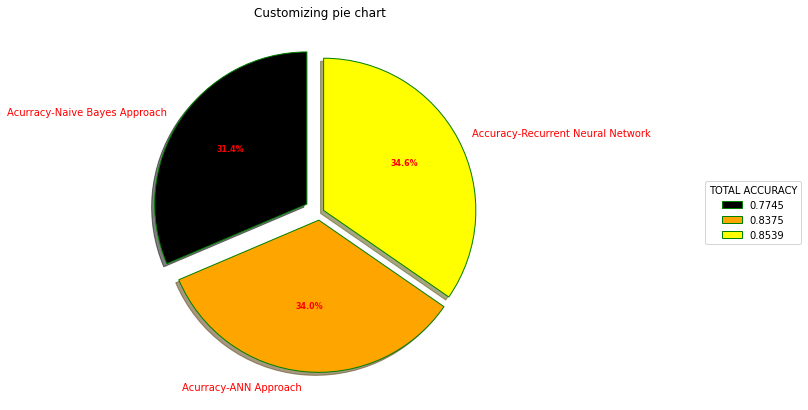

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
  

Approach = ['Acurracy-Naive Bayes Approach', 'Acurracy-ANN Approach','Accuracy-Recurrent Neural Network'] 
  
data = [0.7745,0.8375,0.8539]     
    
# Creating dataset 

  
# Creating explode data 
explode = (0.1, 0.05,0.03) 
  
# Creating color parameters 
colors = ( "black", "orange","yellow") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = Approach, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="red")) 
  
# Adding legend 
ax.legend(wedges,data, 
          title ="TOTAL ACCURACY", 
          loc ="center left", 
          bbox_to_anchor =(1.5, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Customizing pie chart") 
  
# show plot 
plt.show() 
